In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory data analysis
Here we start exploring the data to find out how we should proceed. Thus we visualize the data and we look for missing as well as inconsistent entries. We obviously start by uploading our two main tables.

In [168]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")

In [169]:
application_test.shape

(48744, 121)

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Let's start looking for missing entries and thus choosing how to treat them based on their distribution.

In [4]:
train_null = application_train.isnull()
test_null = application_test.isnull()

print("There's a total of " + str(train_null.sum().sum()) + " missing entries on the application train table.")
print("There's a total of " + str(test_null.sum().sum()) + " missing entries on the application test table.")

del(train_null)
del(test_null)

There's a total of 9152465 missing entries on the application train table.
There's a total of 1404419 missing entries on the application test table.


Since there are a lot of missing values both in the train table as well as in the test table we can't just get rid of rows with NA entries. Instead we must find a way to deal with them (maybe using imputation). We'll come back to it later. For now let's keep going with exploratory data analysis.

We now want to check the types of our features.

In [5]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

We see that there are $65$ continous features, $41$ integers features (remember that two of them are, respectively, the ID of the loan and the target outcome) and $16$ categorical features. Let's start by getting some informations on our continous features.

We start noting that a lot of features refer to informations about building where the clients live. Since there are $42$ of them and we would like to reduce the dimensionality of the problem (in sight of better performance and predictive power later on), let's take a look at those featuresm and see if we can get rid of some of them.

In [6]:
building_features = application_train.columns[44 : 86]
building_features = np.append(building_features, "TOTALAREA_MODE")
building_features

array(['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'],
 

In [7]:
build_features_data = application_train[building_features]

In [8]:
build_features_data

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,...,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,...,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,0.0214
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,...,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000,0.7970
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,...,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,0.0086


The first thing we note is that for every building information we have three values: mean, mode and median. We are interested in seeing if these values are highly correlated (as we suspect).

In [9]:
build_data_correlation = build_features_data.corr()

pd.Series(np.diag(build_data_correlation.iloc[range(0, 13), range(14, 27)]), index = [build_data_correlation.index[:13], build_data_correlation.columns[14:27]])

APARTMENTS_AVG               APARTMENTS_MODE                 0.973259
BASEMENTAREA_AVG             BASEMENTAREA_MODE               0.973496
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE    0.971893
YEARS_BUILD_AVG              YEARS_BUILD_MODE                0.989444
COMMONAREA_AVG               COMMONAREA_MODE                 0.977147
ELEVATORS_AVG                ELEVATORS_MODE                  0.978837
ENTRANCES_AVG                ENTRANCES_MODE                  0.977743
FLOORSMAX_AVG                FLOORSMAX_MODE                  0.985689
FLOORSMIN_AVG                FLOORSMIN_MODE                  0.985875
LANDAREA_AVG                 LANDAREA_MODE                   0.973696
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MODE           0.970117
LIVINGAREA_AVG               LIVINGAREA_MODE                 0.972050
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MODE        0.969370
dtype: float64

In [10]:
pd.Series(np.diag(build_data_correlation.iloc[range(0, 13), range(28, 41)]), index = [build_data_correlation.index[:13], build_data_correlation.columns[28:41]])

APARTMENTS_AVG               APARTMENTS_MEDI                 0.995081
BASEMENTAREA_AVG             BASEMENTAREA_MEDI               0.994317
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.993825
YEARS_BUILD_AVG              YEARS_BUILD_MEDI                0.998495
COMMONAREA_AVG               COMMONAREA_MEDI                 0.995978
ELEVATORS_AVG                ELEVATORS_MEDI                  0.996099
ENTRANCES_AVG                ENTRANCES_MEDI                  0.996886
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997034
FLOORSMIN_AVG                FLOORSMIN_MEDI                  0.997241
LANDAREA_AVG                 LANDAREA_MEDI                   0.991610
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MEDI           0.993825
LIVINGAREA_AVG               LIVINGAREA_MEDI                 0.995596
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MEDI        0.990768
dtype: float64

We actually see a lot of correlation, for every building information, between mean, mode and median. This suggests us we can actually use just one of them and get rid of the others.

Thus we're going to restrict our building informatin features to just the means.

In [11]:
building_features = build_features_data.columns[:13]
building_features = np.append(building_features, "TOTALAREA_MODE")
building_features

array(['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'TOTALAREA_MODE'], dtype=object)

In [12]:
build_features_data = build_features_data[building_features]

In [13]:
build_features_data

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,TOTALAREA_MODE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0149
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0714
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.2898
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0214
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.7970
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,0.0086


We now look if there are other high correlations between these "new" features.

In [14]:
#plt.figure(figsize = (10, 10))
#ax = sns.heatmap(build_features_data.corr(), annot = True, linewidths = 0.5)
#ax.set_ylim(len(build_features_data.corr().columns) + 0.5, -0.5)

We get a bunch of information: first of all features APARTMENTS_AVG, ELEVATORS_AVG, LIVINGAPARTMENTS_AVG, TOTALAREA_MODE and LIVINGAREA_AVG are all correlated and we should just keep one of them.

The same can be said for FLOORSMAX_AVG and FLOORSMIN_AVG.

To choose which of the said features we want to mantain, we're going to look at the standard deviation as well as at the missing values and save the ones with a nice tradeoff of high variance and poor missing entries.

In [15]:
build_features_data.std()

APARTMENTS_AVG                 0.108240
BASEMENTAREA_AVG               0.082438
YEARS_BEGINEXPLUATATION_AVG    0.059223
YEARS_BUILD_AVG                0.113280
COMMONAREA_AVG                 0.076036
ELEVATORS_AVG                  0.134576
ENTRANCES_AVG                  0.100049
FLOORSMAX_AVG                  0.144641
FLOORSMIN_AVG                  0.161380
LANDAREA_AVG                   0.081184
LIVINGAPARTMENTS_AVG           0.092576
LIVINGAREA_AVG                 0.110565
NONLIVINGAPARTMENTS_AVG        0.047732
TOTALAREA_MODE                 0.107462
dtype: float64

In [16]:
build_features_data.isnull().sum()

APARTMENTS_AVG                 156061
BASEMENTAREA_AVG               179943
YEARS_BEGINEXPLUATATION_AVG    150007
YEARS_BUILD_AVG                204488
COMMONAREA_AVG                 214865
ELEVATORS_AVG                  163891
ENTRANCES_AVG                  154828
FLOORSMAX_AVG                  153020
FLOORSMIN_AVG                  208642
LANDAREA_AVG                   182590
LIVINGAPARTMENTS_AVG           210199
LIVINGAREA_AVG                 154350
NONLIVINGAPARTMENTS_AVG        213514
TOTALAREA_MODE                 148431
dtype: int64

We thus choose to keep LIVINGAREA_AVG and FLOORSMAX_AVG.

In [17]:
building_features = np.delete(building_features, [0, 5, 8, 10, 13])
building_features

array(['BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG'], dtype=object)

In [18]:
build_features_data = build_features_data[building_features]

In [19]:
build_features_data

,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG
0,0.0369,0.9722,0.6192,0.0143,0.0690,0.0833,0.0369,0.0190,0.0000
1,0.0529,0.9851,0.7960,0.0605,0.0345,0.2917,0.0130,0.0549,0.0039
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
307506,0.0887,0.9876,0.8300,0.0202,0.1034,0.6042,0.0594,0.1965,0.0753
307507,0.0435,0.9727,0.6260,0.0022,0.1034,0.0833,0.0579,0.0257,0.0000
307508,0.0862,0.9816,0.7484,0.0123,0.2069,0.1667,NaN,0.9279,0.0000
307509,NaN,0.9771,NaN,NaN,0.0690,0.0417,NaN,0.0061,NaN


We now want to treat missing values. Before choosing how to impute them it's better to check if there's a correlation between missing entries and target value.

In [20]:
def check_missing_value_distributions(dataframe, columns, target_vector):
    observations = len(target_vector)
    sns.set()
    for feature in columns:
        target_not_missing = 0
        target_missing = 0
        for row in dataframe.iterrows():
            if(np.isnan(row[1][feature])):
                target_missing = target_missing + target_vector[row[0]]
            else:
                target_not_missing = target_not_missing + target_vector[row[0]]
        f, axes = plt.subplots(1, 2, figsize = (20, 7))
        f.suptitle(feature)
        axes[0].set_title("Not missing values")
        axes[1].set_title("Missing values")
        sns.barplot(x = [0, 1], y = [(observations - target_not_missing) * (100 / observations), target_not_missing * (100 / observations)], ax = axes[0])
        sns.barplot(x = [0, 1], y = [(observations - target_missing) * (100 / observations), target_missing * (100 / observations)], ax = axes[1])

In [21]:
#check_missing_value_distributions(build_features_data, building_features, application_train['TARGET'])

In [22]:
def count_missing_values(dataframe, columns):
    to_return = []
    for row in dataframe.iterrows():
        count = 0
        for feature in columns:
            if(np.isnan(row[1][feature])):
                count = count + 1
        to_return.append(count)
    return(to_return)

In [23]:
missing_features_column = count_missing_values(application_train, building_features)

In [24]:
application_train["MISSING BUILDING DATA"] = missing_features_column

In [25]:
#miss_building_and_target = []
#for index in range(10):
  #  current = application_train["TARGET"][application_train["MISSING BUILDING DATA"] == index]
 #  try:
   #     miss_building_and_target.append(sum(current) / len(current))
  #  except:
  #      miss_building_and_target.append(0)

#sns.barplot(x = list(range(10)), y = miss_building_and_target)

Since it seems there's an increase in the percentage of zero targets when a lot of values are missing we normalize our column so to add a feature.

In [26]:
application_train["MISSING BUILDING DATA"] = application_train["MISSING BUILDING DATA"] > 7

In [27]:
application_train["MISSING BUILDING DATA"]

0         False
1         False
2          True
3          True
4          True
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: MISSING BUILDING DATA, Length: 307511, dtype: bool

In [28]:
missing_features_column = count_missing_values(application_test, building_features)
application_test["MISSING BUILDING DATA"] = missing_features_column
application_test["MISSING BUILDING DATA"] = application_test["MISSING BUILDING DATA"] > 7

Now let's work on other features.

In [29]:
application_train.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [30]:
application_train.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [31]:
enquiries_features = application_train.columns[116:122]
enquiries_features

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [32]:
enquiries_data = application_train[enquiries_features]
enquiries_data

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.0,0.0,0.0,1.0,0.0,1.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#plt.figure(figsize = (10, 10))
#ax = sns.heatmap(enquiries_data.corr(), annot = True, linewidths = 0.5)
#ax.set_ylim(len(enquiries_data.corr().columns) + 0.5, -0.5)

In [34]:
enquiries_missing = count_missing_values(enquiries_data, enquiries_data.columns)
set(enquiries_missing)

{0, 6}

In [35]:
application_train["ENQUIRIES MISSING DATA"] = enquiries_missing

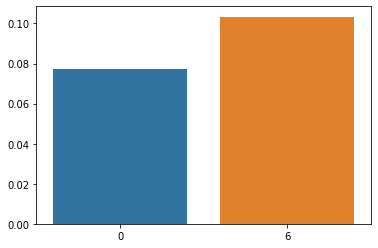

In [36]:
miss_building_and_target = []
for index in range(2):
    current = application_train["TARGET"][application_train["ENQUIRIES MISSING DATA"] == index * 6]
    try:
        miss_building_and_target.append(sum(current) / len(current))
    except:
        miss_building_and_target.append(0)

sns.barplot(x = [0, 6], y = miss_building_and_target)

In [37]:
enquiries_data.isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [38]:
social_features = application_train.columns[91:95]
social_features

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [39]:
social_features_data = application_train[social_features]
social_features_data

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
307506,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,0.0
307508,6.0,0.0,6.0,0.0
307509,0.0,0.0,0.0,0.0


In [40]:
#plt.figure(figsize = (20, 20))
#ax = sns.heatmap(social_features_data.corr(), annot = True, linewidths = 0.5)
#ax.set_ylim(len(social_features_data.corr().columns) + 0.5, -0.5)

In [41]:
social_features_data.std()

OBS_30_CNT_SOCIAL_CIRCLE    2.400989
DEF_30_CNT_SOCIAL_CIRCLE    0.446698
OBS_60_CNT_SOCIAL_CIRCLE    2.379803
DEF_60_CNT_SOCIAL_CIRCLE    0.362291
dtype: float64

In [42]:
social_features = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE"]
social_features_data = social_features_data[social_features]

In [43]:
social_features_data

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
0,2.0,2.0
1,1.0,0.0
2,0.0,0.0
3,2.0,0.0
4,0.0,0.0
...,...,...
307506,0.0,0.0
307507,0.0,0.0
307508,6.0,0.0
307509,0.0,0.0


In [44]:
social_missing = count_missing_values(social_features_data, social_features_data.columns)
set(social_missing)

{0, 2}

In [45]:
application_train["SOCIAL MISSING DATA"] = social_missing

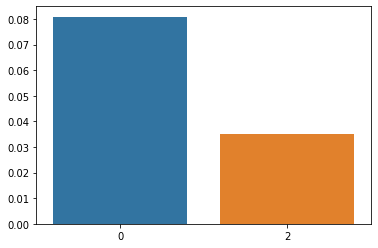

In [46]:
miss_building_and_target = []
for index in range(2):
    current = application_train["TARGET"][application_train["SOCIAL MISSING DATA"] == index * 2]
    try:
        miss_building_and_target.append(sum(current) / len(current))
    except:
        miss_building_and_target.append(0)

sns.barplot(x = [0, 2], y = miss_building_and_target)

In [47]:
social_features_data.isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
dtype: int64

Since there too poor missing values we prefer to not add "MISSING SOCIAL DATA" column.

In [48]:
main_features = application_train.select_dtypes("float64").columns[:8]
main_features = np.append(main_features, application_train.select_dtypes("int64").columns[2:6])
main_features

array(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH'], dtype=object)

In [49]:
main_data = application_train[main_features]
main_data

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0,-9461,-637,-2120
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0,-16765,-1188,-291
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,0,-19046,-225,-2531
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,0,-19005,-3039,-2437
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,0,-19932,-3038,-3458
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0,-9327,-236,-1982
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,0,-20775,365243,-4090
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,NaN,1.0,0,-14966,-7921,-5150
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,NaN,2.0,0,-11961,-4786,-931


In [50]:
#plt.figure(figsize = (10, 10))
#ax = sns.heatmap(main_data.corr(), annot = True, linewidths = 0.5)
#ax.set_ylim(len(main_data.corr().columns) + 0.5, -0.5)

Since AMT_CREDIT and AMT_ANNUITY are highly correlated we are tempted to remove the AMT_ANNUITY feature. But considered it seemes to be a relevant information we prefer to encapsulate this feature in a new parameter: AMT_ANNUITY / AMT_CREDIT.

We do something similar for CNT_FAM_MEMBERS and CNT_CHILDREN where we create a new parameter: NOT_CHILDREN_FAM_MEMBERS.

In [51]:
application_train["PERCENTAGE ANNUITY"] = application_train["AMT_ANNUITY"] / application_train["AMT_CREDIT"]
application_train[["AMT_CREDIT", "AMT_ANNUITY", "PERCENTAGE ANNUITY"]].corr()

,AMT_CREDIT,AMT_ANNUITY,PERCENTAGE ANNUITY
AMT_CREDIT,1.000000,0.770138,-0.558789
AMT_ANNUITY,0.770138,1.000000,-0.063489
PERCENTAGE ANNUITY,-0.558789,-0.063489,1.000000


In [52]:
application_train["NOT_CHILDREN_FAM_MEMBERS"] = application_train["CNT_FAM_MEMBERS"] - application_train["CNT_CHILDREN"]
application_train[["NOT_CHILDREN_FAM_MEMBERS", "CNT_FAM_MEMBERS", "CNT_CHILDREN"]].corr()

,NOT_CHILDREN_FAM_MEMBERS,CNT_FAM_MEMBERS,CNT_CHILDREN
NOT_CHILDREN_FAM_MEMBERS,1.00000,0.625430,0.178030
CNT_FAM_MEMBERS,0.62543,1.000000,0.879161
CNT_CHILDREN,0.17803,0.879161,1.000000


In [53]:
main_features = np.delete(main_features, [2, 3, 7])
main_features

array(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_CHILDREN', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH'], dtype=object)

In [54]:
main_features = np.append(main_features, "PERCENTAGE ANNUITY")
main_features = np.append(main_features, "NOT_CHILDREN_FAM_MEMBERS")
main_features

array(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_CHILDREN', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'PERCENTAGE ANNUITY',
       'NOT_CHILDREN_FAM_MEMBERS'], dtype=object)

In [55]:
application_test["PERCENTAGE ANNUITY"] = application_test["AMT_ANNUITY"] / application_test["AMT_CREDIT"]
application_test["NOT_CHILDREN_FAM_MEMBERS"] = application_test["CNT_FAM_MEMBERS"] - application_test["CNT_CHILDREN"]

In [56]:
main_data = application_train[main_features]
main_data

,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,PERCENTAGE ANNUITY,NOT_CHILDREN_FAM_MEMBERS
0,202500.0,406597.5,0.018801,-3648.0,NaN,0,-9461,-637,-2120,0.060749,1.0
1,270000.0,1293502.5,0.003541,-1186.0,NaN,0,-16765,-1188,-291,0.027598,2.0
2,67500.0,135000.0,0.010032,-4260.0,26.0,0,-19046,-225,-2531,0.050000,1.0
3,135000.0,312682.5,0.008019,-9833.0,NaN,0,-19005,-3039,-2437,0.094941,2.0
4,121500.0,513000.0,0.028663,-4311.0,NaN,0,-19932,-3038,-3458,0.042623,1.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,0.032561,-8456.0,NaN,0,-9327,-236,-1982,0.108198,1.0
307507,72000.0,269550.0,0.025164,-4388.0,NaN,0,-20775,365243,-4090,0.044524,1.0
307508,153000.0,677664.0,0.005002,-6737.0,NaN,0,-14966,-7921,-5150,0.044239,1.0
307509,171000.0,370107.0,0.005313,-2562.0,NaN,0,-11961,-4786,-931,0.054592,2.0


In [57]:
#check_missing_value_distributions(application_train, main_features, application_train['TARGET'])

In [58]:
main_data.isnull().sum()

AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
REGION_POPULATION_RELATIVE         0
DAYS_REGISTRATION                  0
OWN_CAR_AGE                   202929
CNT_CHILDREN                       0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
PERCENTAGE ANNUITY                12
NOT_CHILDREN_FAM_MEMBERS           2
dtype: int64

In [59]:
own_car_null = count_missing_values(application_train, ["OWN_CAR_AGE"])

In [60]:
application_train["OWN_CAR_NULL"] = own_car_null

In [61]:
own_car_null = count_missing_values(application_test, ["OWN_CAR_AGE"])
application_test["OWN_CAR_NULL"] = own_car_null

In [62]:
ext_features = application_train.select_dtypes("float64").columns[8:11]
ext_features

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], dtype='object')

In [63]:
ext_data = application_train[ext_features]
ext_data

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN
...,...,...,...
307506,0.145570,0.681632,NaN
307507,NaN,0.115992,NaN
307508,0.744026,0.535722,0.218859
307509,NaN,0.514163,0.661024


In [64]:
#plt.figure(figsize = (10, 10))
#ax = sns.heatmap(ext_data.corr(), annot = True, linewidths = 0.5)
#ax.set_ylim(len(ext_data.corr().columns) + 0.5, -0.5)

In [65]:
#check_missing_value_distributions(application_train, ext_features, application_train['TARGET'])

In [66]:
ext_data.isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [67]:
flag_features = application_train.select_dtypes('int64').columns[21:-2]
flag_features = np.append(flag_features, application_train.select_dtypes('int64').columns[6:12])
flag_features

array(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'ENQUIRIES MISSING DATA',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], dtype=object)

In [68]:
flag_document_data = application_train[flag_features]

In [69]:
#plt.figure(figsize = (30, 30))
#ax = sns.heatmap(flag_document_data.corr(), annot = True, linewidths = 0.5)
#ax.set_ylim(len(flag_document_data.corr().columns) + 0.5, -0.5)

In [70]:
last_features = application_train.select_dtypes("int64").columns[12:21]
last_features

Index(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [71]:
last_data = application_train[last_features]

In [72]:
#plt.figure(figsize = (20, 20))
#ax = sns.heatmap(last_data.corr(), annot = True, linewidths = 0.5)
#ax.set_ylim(len(last_data.corr().columns) + 0.5, -0.5)

In [73]:
last_data.isnull().sum()

REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
dtype: int64

In [74]:
last_data.std()

REGION_RATING_CLIENT           0.509034
REGION_RATING_CLIENT_W_CITY    0.502737
HOUR_APPR_PROCESS_START        3.265832
REG_REGION_NOT_LIVE_REGION     0.122126
REG_REGION_NOT_WORK_REGION     0.219526
LIVE_REGION_NOT_WORK_REGION    0.197499
REG_CITY_NOT_LIVE_CITY         0.268444
REG_CITY_NOT_WORK_CITY         0.421124
LIVE_CITY_NOT_WORK_CITY        0.383817
dtype: float64

In [75]:
last_features = np.delete(last_features, [1, 3, 8])
last_features

Index(['REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY'],
      dtype='object')

---
# Final dataset
We can finally setup all the features of our data set.

In [76]:
all_features = building_features
all_features = np.append(all_features, "SK_ID_CURR")
all_features = np.append(all_features, "MISSING BUILDING DATA")
all_features = np.append(all_features, enquiries_features)
all_features = np.append(all_features, social_features)
all_features = np.append(all_features, main_features)
all_features = np.append(all_features, "OWN_CAR_NULL")
all_features = np.append(all_features, ext_features)
all_features = np.append(all_features, flag_features)
all_features = np.append(all_features, last_features)
all_features = np.append(all_features, application_train.select_dtypes('object').columns)
all_features

array(['BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'SK_ID_CURR', 'MISSING BUILDING DATA',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_CHILDREN', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'PERCENTAGE ANNUITY',
       'NOT_CHILDREN_FAM_MEMBERS', 'OWN_CAR_NULL', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', '

In [77]:
np.where(all_features == 'ENQUIRIES MISSING DATA')

#all_features[53]
#np.where(all_features == 'SK_ID_CURR')

(array([54], dtype=int64),)

In [78]:
import numpy as np
all_features = np.delete(all_features,54)
#all_features['ENQUIRIES MISSING DATA'] 

In [79]:
np.where(all_features == 'ENQUIRIES MISSING DATA')

(array([], dtype=int64),)

In [80]:
final_application_train = application_train[np.append(all_features, "TARGET")]
final_application_test = application_test[all_features]

In [81]:
final_application_train.head()

,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,SK_ID_CURR,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,0.0369,0.9722,0.6192,0.0143,0.0690,0.0833,0.0369,0.0190,0.0000,100002,...,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,1
1,0.0529,0.9851,0.7960,0.0605,0.0345,0.2917,0.0130,0.0549,0.0039,100003,...,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100004,...,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100006,...,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100007,...,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN,0


In [82]:
final_application_test.head()

,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,SK_ID_CURR,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.0590,0.9732,NaN,NaN,0.1379,0.125,NaN,0.0505,NaN,100001,...,Higher education,Married,House / apartment,NaN,TUESDAY,Kindergarten,NaN,block of flats,"Stone, brick",No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100005,...,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100013,...,Higher education,Married,House / apartment,Drivers,MONDAY,Transport: type 3,NaN,NaN,NaN,NaN
3,0.1974,0.9970,0.9592,0.1165,0.2759,0.375,0.2042,0.3673,0.0386,100028,...,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100038,...,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,Business Entity Type 3,NaN,NaN,NaN,NaN


In [83]:
final_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
BASEMENTAREA_AVG               127568 non-null float64
YEARS_BEGINEXPLUATATION_AVG    157504 non-null float64
YEARS_BUILD_AVG                103023 non-null float64
COMMONAREA_AVG                 92646 non-null float64
ENTRANCES_AVG                  152683 non-null float64
FLOORSMAX_AVG                  154491 non-null float64
LANDAREA_AVG                   124921 non-null float64
LIVINGAREA_AVG                 153161 non-null float64
NONLIVINGAPARTMENTS_AVG        93997 non-null float64
SK_ID_CURR                     307511 non-null int64
MISSING BUILDING DATA          307511 non-null bool
AMT_REQ_CREDIT_BUREAU_HOUR     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY      265992 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_MON      265992 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT      265992 non-null float64
AMT_REQ_CREDIT_B

# Let's upload our other datasets

In [84]:
bureau = pd.read_csv('bureau.csv')
bureau.head()
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()
pos_cash_bal = pd.read_csv('POS_CASH_balance.csv')
pos_cash_bal.head()
credit_card_bal= pd.read_csv('credit_card_balance.csv')
credit_card_bal.head()
previous_app = pd.read_csv('previous_application.csv')
previous_app.head()
installments_pay = pd.read_csv('installments_payments.csv')
#installments_pay.head()

In [85]:
def Checkimputandencode(df):
    for colum in df.columns:
        if df[colum].dtype.name == 'int64':
            df[colum] = df[colum].fillna(int(round(df[colum].mean())))
        elif df[colum].dtype.name == 'float64':
            df[colum] = df[colum].fillna(df[colum].mean())
        elif df[colum].dtype.name == 'bool':
            df[colum] = df[colum]*1        
    df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
    df = pd.get_dummies(df)
    return df

In [86]:
#I wan to create a function that takes my datasets with more rows
#every person and clean it in a condensate df
#for now for bureau
phrase = 'SK_ID_CURR'
def creatorofdfsecondary(df, phrase):
    #first i take out cathegoricals
    k = Checkimputandencode(df)
    
    df2 = k.groupby([phrase]).sum()
    return df2  

In [211]:
bureau2 = creatorofdfsecondary(bureau,'SK_ID_CURR' ).drop('SK_ID_BUREAU',1)
bureau2.head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-5145,0,577.000000,-6354.311444,26777.923629,0,1453365.000,596686.500000,6229.514980,0.0,...,0,0,0,0,0,0,0,0,0,0
100002,-6992,0,-1072.965275,-6219.874296,19881.397984,0,865055.565,657036.359856,56906.624921,0.0,...,0,0,0,0,0,0,0,0,0,0
100003,-5603,0,-2178.000000,-4309.437148,0.000000,0,1017400.500,0.000000,810000.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
100004,-1734,0,-977.000000,-1065.000000,3825.417661,0,189037.800,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
100005,-572,0,1318.000000,-2157.874296,7650.835323,0,657126.000,568408.500000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#fts = gimmefeatures(bureau2)
def correlationdataset(df):
    plt.figure(figsize = (20, 20))
    ax = sns.heatmap(df.corr(), annot = True, linewidths = 0.5)
    ax.set_ylim(len(df.corr().columns) + 0.5, -0.5)

In [212]:
bureau2.columns

Index(['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY',
       'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold',
       'CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2',
       'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4',
       'CREDIT_TYPE_Another type of loan', 'CREDIT_TYPE_Car loan',
       'CREDIT_TYPE_Cash loan (non-earmarked)', 'CREDIT_TYPE_Consumer credit',
       'CREDIT_TYPE_Credit card', 'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Mi

In [90]:
#correlationdataset(bureau2)
#I take out the higly correlated, that can come from cathegoricals or inner properties.

In [213]:
bureau2 = bureau2.drop(['DAYS_CREDIT_ENDDATE','CREDIT_CURRENCY_currency 1', 'DAYS_ENDDATE_FACT', 'CREDIT_TYPE_Consumer credit'], 1)
bureau2.columns

Index(['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold',
       'CREDIT_CURRENCY_currency 2', 'CREDIT_CURRENCY_currency 3',
       'CREDIT_CURRENCY_currency 4', 'CREDIT_TYPE_Another type of loan',
       'CREDIT_TYPE_Car loan', 'CREDIT_TYPE_Cash loan (non-earmarked)',
       'CREDIT_TYPE_Credit card', 'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan',
       'CREDIT_TYPE_Mortgage', 'CREDIT_TYPE_Real estate loan',
       'CR

In [92]:
#for Bureau_bal i have the sk_id bureau so I add a line for everyone
#I WILL NOT USE THIS DATASET VBECAUSE SK_ID_BUREAU CREATES PROBLEMS
#bureau_balance

In [214]:
pos_cash_bal2 = creatorofdfsecondary(pos_cash_bal,'SK_ID_CURR' ).drop('SK_ID_PREV',1)
pos_cash_bal2.head()

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
SK_ID_CURR,,,,,,,,,,,,,,
100001,-653,36.00000,13.00000,7,7,7.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
100002,-190,456.00000,285.00000,0,0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,-1226,283.00000,162.00000,0,0,26.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
100004,-102,15.00000,9.00000,0,0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100005,-220,134.08965,82.48384,0,0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [215]:
pos_cash_bal2.columns

Index(['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD',
       'SK_DPD_DEF', 'NAME_CONTRACT_STATUS_Active',
       'NAME_CONTRACT_STATUS_Amortized debt', 'NAME_CONTRACT_STATUS_Approved',
       'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Completed',
       'NAME_CONTRACT_STATUS_Demand',
       'NAME_CONTRACT_STATUS_Returned to the store',
       'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_XNA'],
      dtype='object')

In [216]:
#correlationdataset(pos_cash_bal2)

In [217]:
pos_cash_bal2 = pos_cash_bal2.drop(['CNT_INSTALMENT','NAME_CONTRACT_STATUS_Amortized debt',
                                   'CNT_INSTALMENT_FUTURE','NAME_CONTRACT_STATUS_Completed'],1)
pos_cash_bal2.columns

Index(['MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF', 'NAME_CONTRACT_STATUS_Active',
       'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Canceled',
       'NAME_CONTRACT_STATUS_Demand',
       'NAME_CONTRACT_STATUS_Returned to the store',
       'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_XNA'],
      dtype='object')

In [218]:
credit_card_bal2 = creatorofdfsecondary(credit_card_bal,'SK_ID_CURR' ).drop('SK_ID_PREV',1)
credit_card_bal2.head()

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,...,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,-21,0.000,1620000,35767.948932,0.0,1729.017495,17812.829086,0.000000,61683.226212,0.000,...,0.000000,0,0,6,0,0,0,0,0,0
100011,-2849,4031676.225,12150000,180000.000000,180000.0,0.000000,0.000000,292344.399129,358386.750000,334485.000,...,1901.825084,0,0,74,0,0,0,0,0,0
100013,-4656,1743352.245,12645000,607267.948932,571500.0,1729.017495,17812.829086,154235.448900,688161.240000,654448.545,...,1811.775587,1,1,96,0,0,0,0,0,0
100021,-170,0.000,11475000,101342.521975,0.0,4898.882901,50469.682411,0.000000,174769.140934,0.000,...,0.000000,0,0,7,0,10,0,0,0,0
100023,-60,0.000,1080000,47690.598576,0.0,2305.356659,23750.438781,0.000000,82244.301616,0.000,...,0.000000,0,0,8,0,0,0,0,0,0


In [219]:
credit_card_bal2.columns

Index(['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL',
       'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD',
       'SK_DPD_DEF', 'NAME_CONTRACT_STATUS_Active',
       'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Completed',
       'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Refused',
       'NAME_CONTRACT_STATUS_Sent proposal', 'NAME_CONTRACT_STATUS_Signed'],
      dtype='object')

In [220]:
#correlationdataset(credit_card_bal2)

In [221]:
credit_card_bal2 = credit_card_bal2.drop(['AMT_RECIVABLE','AMT_DRAWINGS_POS_CURRENT','AMT_INST_MIN_REGULARITY',
                                          'CNT_INSTALMENT_MATURE_CUM','NAME_CONTRACT_STATUS_Active',], 1)
credit_card_bal2.columns

Index(['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'SK_DPD', 'SK_DPD_DEF',
       'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Completed',
       'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Refused',
       'NAME_CONTRACT_STATUS_Sent proposal', 'NAME_CONTRACT_STATUS_Signed'],
      dtype='object')

In [222]:
previous_app2 = creatorofdfsecondary(previous_app,'SK_ID_CURR' ).drop('SK_ID_PREV',1)
previous_app2.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000000,24835.5,23787.0,2520.000000,2.483550e+04,13,1,0.104326,0.188357,0.773503,...,0,0,0,0,0,0,1,0,0,0
100002,9251.775000,179055.0,179055.0,0.000000,1.790550e+05,9,1,0.000000,0.188357,0.773503,...,0,0,0,0,0,0,0,0,1,0
100003,169661.970000,1306309.5,1452573.0,13582.402139,1.306310e+06,44,3,0.179697,0.565071,2.320508,...,1,0,1,0,1,0,0,0,0,0
100004,5357.250000,24282.0,20106.0,4860.000000,2.428200e+04,5,1,0.212008,0.188357,0.773503,...,0,0,0,0,0,0,0,1,0,0
100005,20768.320659,44617.5,40153.5,11161.402139,2.724648e+05,21,2,0.188601,0.376714,1.547005,...,0,0,0,0,0,0,1,0,0,0


In [223]:
previous_app2.columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED',
       ...
       'PRODUCT_COMBINATION_Cash X-Sell: low',
       'PRODUCT_COMBINATION_Cash X-Sell: middle',
       'PRODUCT_COMBINATION_POS household with interest',
       'PRODUCT_COMBINATION_POS household without interest',
       'PRODUCT_COMBINATION_POS industry with interest',
       'PRODUCT_COMBINATION_POS industry without interest',
       'PRODUCT_COMBINATION_POS mobile with interest',
       'PRODUCT_COMBINATION_POS mobile without interest',
       'PRODUCT_COMBINATION_POS other with interest',
       'PRODUCT_COMBINATION_POS others without interest'],
      dtype='object', length=162)

In [224]:
#too big!!!!!!!!!!!!!!!!!!!!!!!
#correlationdataset(previous_app2)

In [225]:
installments_pay2 = creatorofdfsecondary(installments_pay,'SK_ID_CURR' ).drop('SK_ID_PREV',1)
installments_pay2.head()

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,
100001,8.0,19,-15314.0,-15365.0,41195.925,41195.925
100002,20.0,190,-5605.0,-5993.0,219625.695,219625.695
100003,26.0,127,-34454.0,-34633.0,1618864.650,1618864.650
100004,4.0,6,-2262.0,-2285.0,21288.465,21288.465
100005,10.0,45,-5274.0,-5486.0,56161.845,56161.845


In [226]:
installments_pay2.columns

Index(['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
       'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [227]:
#correlationdataset(installments_pay2)

In [228]:
installments_pay2 = installments_pay2.drop(['NUM_INSTALMENT_NUMBER','AMT_INSTALMENT'],1)
installments_pay2.columns

Index(['NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_PAYMENT'],
      dtype='object')

In [115]:
'''So we will use
bureau2 
pos_cash_bal2
credit_card_bal2
installments_pay2
'''
files = [bureau2,
pos_cash_bal2,
credit_card_bal2,
installments_pay2]

In [183]:
TR = pd.read_csv("application_train.csv")
TT= pd.read_csv("application_test.csv")

In [185]:
namestrain = list(TR['SK_ID_CURR'])
namestest = list(TT['SK_ID_CURR'])

In [209]:
bureau2.head()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-5145,0,26777.923629,0,1453365.000,596686.500000,6229.514980,0.0,-652,24817.5000,...,0,0,0,0,0,0,0,0,0,0
100002,-6992,0,19881.397984,0,865055.565,657036.359856,56906.624921,0.0,-3999,15712.7577,...,0,0,0,0,0,0,0,0,0,0
100003,-5603,0,0.000000,0,1017400.500,0.000000,810000.000000,0.0,-3264,62851.0308,...,0,0,0,0,0,0,0,0,0,0
100004,-1734,0,3825.417661,0,189037.800,0.000000,0.000000,0.0,-1064,31425.5154,...,0,0,0,0,0,0,0,0,0,0
100005,-572,0,7650.835323,0,657126.000,568408.500000,0.000000,0.0,-163,4261.5000,...,0,0,0,0,0,0,0,0,0,0


In [207]:
pos_cash_bal2.head()

,MONTHS_BALANCE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
SK_ID_CURR,,,,,,,,,,
100001,-653,7,7,7.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,-190,0,0,19.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,-1226,0,0,26.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,-102,0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,-220,0,0,9.0,0.0,0.0,0.0,0.0,1.0,0.0


In [229]:
#I now prepare my datasetst to joing the main one
TR = pd.read_csv("application_train.csv")
TT= pd.read_csv("application_test.csv")
namestrain = list(TR['SK_ID_CURR'])
namestest = list(TT['SK_ID_CURR'])
btrain = bureau2.reindex(namestrain)
btest = bureau2.reindex(namestest)
ptrain = pos_cash_bal2.reindex(namestrain)
ptest = pos_cash_bal2.reindex(namestest)
ctrain = credit_card_bal2.reindex(namestrain)
ctest = credit_card_bal2.reindex(namestest)
itrain = installments_pay2.reindex(namestrain)
itest = installments_pay2.reindex(namestest)

# Groupby test and train by sk_id_curr

In [263]:
#Train = final_application_train.groupby(['SK_ID_CURR']).sum()
Train = final_application_train.set_index('SK_ID_CURR')
Test = final_application_test.set_index('SK_ID_CURR')

## ADD the new features

In [151]:
#peopletrain = list(final_application_train['SK_ID_CURR'])
#poepletest = list(final_application_test['SK_ID_CURR'])
#def merger(df1,df2, people):
 #   col = list(df2.columns)
 #   df1 = pd.concat([df1, pd.DataFrame(columns = col, sort = True)]), 
 #   #create empy cell based on new columns
 #   for c in col:
  #      for i in people:
    #        try:
    #            df1.loc[i,c] = df2.loc[i,c]
     #       except KeyError:
    #            pass 
   # return df1    

In [180]:
Train.shape

(307511, 82)

In [176]:
Train.head()

,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,MISSING BUILDING DATA,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.0369,0.9722,0.6192,0.0143,0.0690,0.0833,0.0369,0.0190,0.0000,False,...,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,1
100003,0.0529,0.9851,0.7960,0.0605,0.0345,0.2917,0.0130,0.0549,0.0039,False,...,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,0
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN,0
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN,0
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN,0


In [233]:
ctrain

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_TOTAL_RECEIVABLE,...,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,-21.0,0.0,1620000.0,35767.948932,0.0,1729.017495,61683.226212,0.0,0.0,0.0,...,0.028875,3.356875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
itrain.shape

(307511, 4)

In [237]:
Test.shape

(48744, 81)

In [234]:
T = Train.join(ctrain, how='outer', lsuffix='_left', rsuffix='_right')
T.shape

(307511, 145)

In [179]:
T = Train.join(bureau2, how='outer')
T.shape

(349831, 113)

In [264]:
#btrain = bureau2.reindex(namestrain)
#btest = bureau2.reindex(namestest)
#ptrain = pos_cash_bal2.reindex(namestrain)
#ptest = pos_cash_bal2.reindex(namestest)
#ctrain = credit_card_bal2.reindex(namestrain)
#ctest = credit_card_bal2.reindex(namestest)
#itrain = installments_pay2.reindex(namestrain)
#itest = installments_pay2.reindex(namestest)

Train = Train.join(btrain, how='outer')
Train = Train.join(ptrain, how='outer')
Train = Train.join(ctrain, how='outer', lsuffix='_left', rsuffix='_right')
Train = Train.join(itrain, how='outer')
Test = Test.join(btest, how='outer')
Test = Test.join(ptest, how='outer')
Test = Test.join(ctest, how='outer', lsuffix='_left', rsuffix='_right')
Test = Test.join(itest, how='outer')

In [132]:
def fun(y,x):
    for i in x:
        if i not in y:
            print(i)
fun(list(final_application_test.columns),list(final_application_train.columns) )

TARGET


In [239]:
fun(Test, Train)

TARGET


In [240]:
fun(Train, Test)

Per ora tiro fuori da train<br> MISSING BUILDING DATA
CODE_GENDER_XNA
NAME_INCOME_TYPE_Maternity leave
NAME_FAMILY_STATUS_Unknown

In [241]:
Train.to_csv("Train.csv")
Test.to_csv('Test.csv')

In [265]:
Train.shape

(307511, 149)

In [266]:
Test.shape

(48744, 148)

# NOw a little mess because the features in the columns actually do not coincide

In [303]:
Train = pd.read_csv("Train.csv")
Test = pd.read_csv("Test.csv")

In [304]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [305]:
train_data = pd.read_csv("Train.csv", index_col = 0)
Test = pd.read_csv("Test.csv", index_col = 0)

In [306]:
train_data["MISSING BUILDING DATA"] = list(map(int, train_data["MISSING BUILDING DATA"]))

In [307]:
for feature in train_data.select_dtypes("object").columns:
    train_data[feature].fillna(train_data[feature].mode()[0], inplace = True)

In [308]:
train_data = pd.get_dummies(train_data)

In [309]:
for feature in train_data.select_dtypes("float64").columns:
    train_data[feature].fillna(train_data[feature].mean(), inplace = True)
    
for feature in train_data.select_dtypes("int64").columns:
    train_data[feature].fillna(train_data[feature].median(), inplace = True)

In [310]:
#Test = pd.read_csv("Test.csv")
Test =  pd.get_dummies(Test)
for feature in Test.select_dtypes("float64").columns:
    Test[feature].fillna(train_data[feature].mean(), inplace = True)
    
for feature in Test.select_dtypes("int64").columns:
    Test[feature].fillna(train_data[feature].median(), inplace = True)

In [ ]:
train_data.to_csv('train_data.csv')
Test.to_csv('test_data.csv')

In [ ]:
train_data.shape

In [ ]:
Test.shape

In [ ]:
fun(Test,train_data)

In [ ]:
train_data = train_data.drop(['CODE_GENDER_XNA',
'NAME_INCOME_TYPE_Maternity leave',
'NAME_FAMILY_STATUS_Unknown'], 1)

In [ ]:
train_data.shape

In [ ]:
#train_data = pd.read_csv('train_data.csv')
#Test = pd.read('test_data.csv')

In [ ]:
k_fold = KFold(n_splits = 10, random_state = 42, shuffle = True)
folds = []
for train_index, test_index in k_fold.split(train_data):
    to_append = {"Train" : train_data.iloc[train_index,], "Test" : train_data.iloc[test_index]}
    folds.append(to_append)

In [ ]:
roc_scores = []
for fold in folds:
    reg = RandomForestClassifier(n_estimators = 100)
    reg.fit(fold["Train"].drop(["TARGET"], axis = 1), fold["Train"]["TARGET"])
    probabilities = reg.predict_proba(fold["Test"].drop(["TARGET"], axis = 1))
    roc_scores.append(roc_auc_score(fold["Test"]["TARGET"], probabilities[:, 1]))
    print("Hey")

In [ ]:
sum(roc_scores) / len(roc_scores)

In [ ]:
Test = Test.set_index('SK_ID_CURR')
Test.head()

In [ ]:
#Test = pd.read_csv("Test.csv")
Test =  pd.get_dummies(Test)
for feature in Test.select_dtypes("float64").columns:
    Test[feature].fillna(train_data[feature].mean(), inplace = True)
    
for feature in Test.select_dtypes("int64").columns:
    Test[feature].fillna(train_data[feature].median(), inplace = True)

In [ ]:
Test.head()

In [ ]:
namestest = TT['SK_ID_CURR']
namestest

In [ ]:
#P

In [ ]:
namestest = TT['SK_ID_CURR']
P = reg.predict_proba(Test)
preds = pd.DataFrame()
preds['SK_ID_CURR'] = namestest
l = []
for i in P:
    l.append(i[1])
preds['TARGET'] = l
preds.to_csv('try1.csv', index = False)

In [ ]:
preds